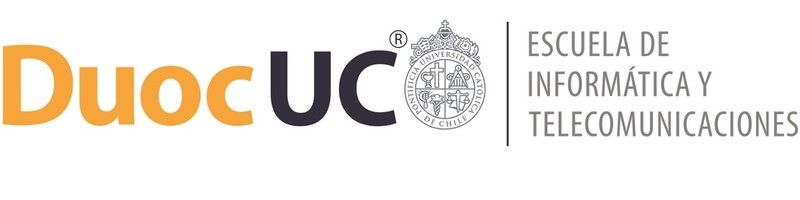

# Proyecto de Título: Modelo de Clasificación de Síntomas

- Marcel Brard
- Raimundo Estévez
- Soledad Inostroza

Docente: Pablo Andres Espinoza Quilaqueo

Sección: Capstone 008V

# Fase 1: Business Understanding

## Observación de los datos

La información disponible para este caso se compone de un dataset con formato CSV (Valores separados por coma) con datos de diagnósticos y sus síntomas.

La información disponible para este caso se compone de un conjunto de datos en formato CSV (Valores Separados por Coma) que contiene registros de diagnósticos médicos y sus síntomas asociados. Cada registro representa un caso individual de paciente e incluye:

Síntomas Presentados: Una lista de síntomas experimentados por el paciente.
Enfermedad Diagnosticada (Disease): La condición médica identificada en base a los síntomas presentados.


## Contexto del caso

El caso se centra en la necesidad de realizar diagnósticos médicos de forma remota mediante una aplicación web. Esta aplicación permitirá a los usuarios ingresar sus síntomas y, utilizando un modelo de machine learning, obtener un diagnóstico probable de su condición médica.


## Objetivos (Target)

El objetivo principal es desarrollar un modelo de clasificación de machine learning que prediga con precisión la enfermedad (columna "Disease") en función de los síntomas ingresados por el usuario. Este modelo será la pieza central de la aplicación web Medical AID.

# Fase 2: Data Understanding

## Importando librerías

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
from seaborn import load_dataset

## Importando dataset

In [ ]:
import gdown

# URL del enlace de Google Drive
file_id = '1-V8W-QkPCBjl5tqGQaV7JOKgjm2s3XYw'
url = f'https://drive.google.com/uc?id={file_id}'

# Descargar el archivo desde Google Drive
output = 'dataset2.csv'  # Nombre del archivo de salida
gdown.download(url, output, quiet=False)

# Cargar el archivo Excel en un DataFrame
data = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1-V8W-QkPCBjl5tqGQaV7JOKgjm2s3XYw
To: /content/dataset2.csv
100%|██████████| 632k/632k [00:00<00:00, 28.8MB/s]


## Desplegando información básica del conjunto de datos

Se puede visualizar 17 columnas:
- Una de la enfermedad.
- El resto (16) de los síntomas asociados a la enfermedad.
Contiene 313 filas, el número de valores números se aumenta a medida que se avanza en la columna de síntoma. Esto quiere decir que probablemente se fueron agregando columnas de síntomas a medida que se daba la necesidad de ingresar nuevos síntomas.

Además se puede visualizar una muestra de las 5 primeras filas, donde la enfermedad corresponde a sida (AIDS).

In [ ]:
# Descplegando información básica del conjunto de datos y las primeras filas para entender su estructura
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


(None,
             Disease   Symptom_1              Symptom_2              Symptom_3  \
 0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
 1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
 2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
 3  Fungal infection     itching              skin_rash    dischromic _patches   
 4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
 
               Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
 0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
 1                   NaN       NaN       NaN       NaN       NaN       NaN   
 2                   NaN       NaN       NaN       NaN       NaN       NaN   
 3                   NaN       NaN       NaN       NaN       NaN       NaN   
 4                   NaN       NaN       NaN       NaN       NaN       NaN   
 
   Symptom_10 Symptom_11 Symp

## Visualizando el balance de clases y valores nulos por síntoma

Se puede visualizar que las clases están balanceadas. Por lo que no será necesario balancearlos para obtener un modelo sin sesgos.

Adicionalmente se confirma el aumento de valores nulos a medida que se avanza en la columna de síntoma.

Distribución de las enfermedeades


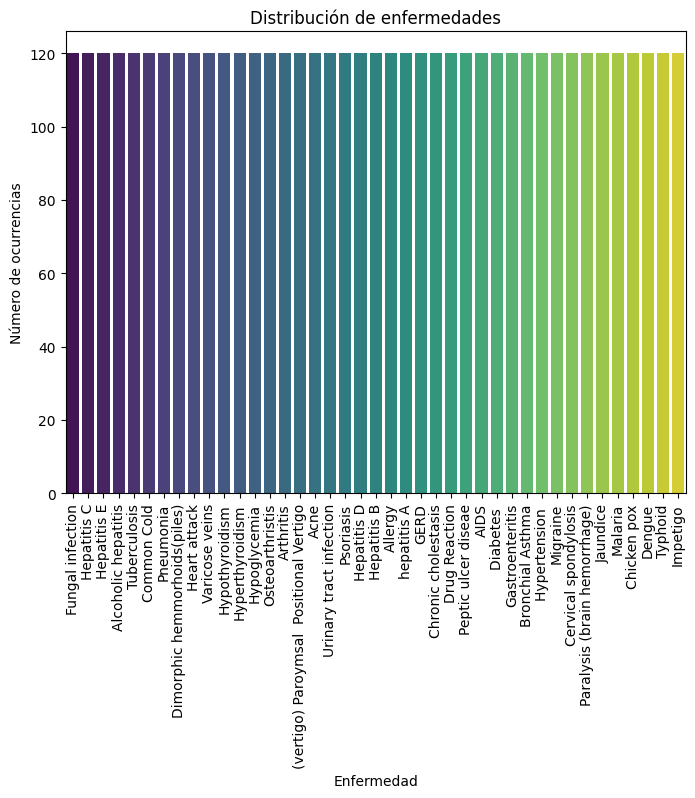

Cantidad de valores números por síntoma


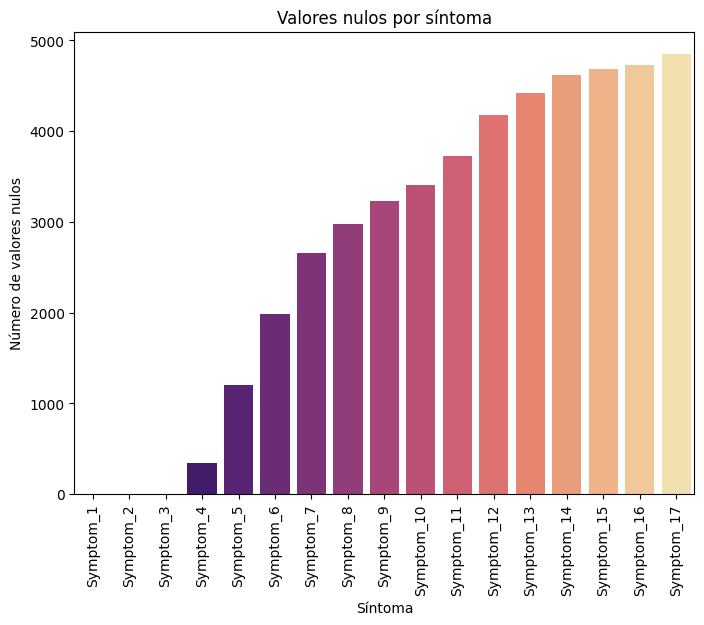

In [ ]:
# Contando la ocurrencia de cada enfermedad
disease_counts = data['Disease'].value_counts()

# Visualizando la distribución de las enfermedades
print("Distribución de las enfermedeades")
plt.figure(figsize=(8, 6))
sns.barplot(x=disease_counts.index, y=disease_counts.values, hue=disease_counts.index, palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.title('Distribución de enfermedades')
plt.xlabel('Enfermedad')
plt.ylabel('Número de ocurrencias')
plt.show()

# Contando los valores nulos por cada síntoma
missing_symptoms = data.isnull().sum()[1:]
print("Cantidad de valores números por síntoma")
# Visualizando la cantidad de valores nulos por síntoma
plt.figure(figsize=(8, 6))
sns.barplot(x=missing_symptoms.index, y=missing_symptoms.values, hue=missing_symptoms.index, palette='magma', legend=False)
plt.xticks(rotation=90)
plt.title('Valores nulos por síntoma')
plt.xlabel('Síntoma')
plt.ylabel('Número de valores nulos')
plt.show()


### Estructura y contenido de los conjuntos de datos

# Fase 3: Data Preparation

## One-Hot Encoding

La primera transformación será aplicar el método de One-Hot Encoding al dataset para preparar la data, que es completamente categorica nominal.

### Cambiando formato

Para esto se combinan todas las columnas de síntomas en una sola, de tal forma quedará con un formato válido para aplicar el One-Hot Encoding.

In [ ]:
cols = data.columns
data2 = data[cols].values.flatten()

s = pd.Series(data2)
s = s.str.strip()
s = s.values.reshape(data.shape)

data = pd.DataFrame(s, columns=data.columns)
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Combinar todas las columnas de los síntomas en una sola columna, ignorando valores nulos
symptom_columns = [col for col in data.columns if 'Symptom' in col]
data['All_Symptoms'] = data[symptom_columns].apply(lambda row: ','.join(row.dropna().astype(str)), axis=1)

# Desplegando la nueva columna combinada
print(data[['Disease', 'All_Symptoms']].head())

            Disease                                       All_Symptoms
0  Fungal infection  itching,skin_rash,nodal_skin_eruptions,dischro...
1  Fungal infection  skin_rash,nodal_skin_eruptions,dischromic _pat...
2  Fungal infection   itching,nodal_skin_eruptions,dischromic _patches
3  Fungal infection              itching,skin_rash,dischromic _patches
4  Fungal infection             itching,skin_rash,nodal_skin_eruptions


### Aplicando One-Hot Encoding

In [ ]:
# Aplicando One-Hot Encoding a la columna de síntomas combinados
symptoms_encoded = data['All_Symptoms'].str.get_dummies(sep=',')

# Desplegando el resultado
print(symptoms_encoded.head())

   abdominal_pain  abnormal_menstruation  acidity  acute_liver_failure  \
0               0                      0        0                    0   
1               0                      0        0                    0   
2               0                      0        0                    0   
3               0                      0        0                    0   
4               0                      0        0                    0   

   altered_sensorium  anxiety  back_pain  belly_pain  blackheads  \
0                  0        0          0           0           0   
1                  0        0          0           0           0   
2                  0        0          0           0           0   
3                  0        0          0           0           0   
4                  0        0          0           0           0   

   bladder_discomfort  ...  vomiting  watering_from_eyes  weakness_in_limbs  \
0                   0  ...         0                   0           

### Creando nuevo DF

Se crea un nuevo dataframe con las columnas obtenidas del One-Hot Encoding, se eliminan las columnas originales y la columna de síntomas concatenados.

In [ ]:
# Dropeando la columna de síntomas combinados y todas las columnas de síntomas originales
data_cleaned = data.drop(columns=symptom_columns + ['All_Symptoms'])

# Concatenando los síntomas obtenidos del One-Hot Encoding con el el diagnóstico
data_prepared = pd.concat([data_cleaned, symptoms_encoded], axis=1)

# Desplegando el dataset preparado
print(data_prepared.head())

            Disease  abdominal_pain  abnormal_menstruation  acidity  \
0  Fungal infection               0                      0        0   
1  Fungal infection               0                      0        0   
2  Fungal infection               0                      0        0   
3  Fungal infection               0                      0        0   
4  Fungal infection               0                      0        0   

   acute_liver_failure  altered_sensorium  anxiety  back_pain  belly_pain  \
0                    0                  0        0          0           0   
1                    0                  0        0          0           0   
2                    0                  0        0          0           0   
3                    0                  0        0          0           0   
4                    0                  0        0          0           0   

   blackheads  ...  vomiting  watering_from_eyes  weakness_in_limbs  \
0           0  ...         0           

### Revisando el resultado

Se realiza una revisión del nombre de las columnas para verificar que no existen duplicados o detectar problemas.

Se verifica que no existen duplicados ni problemas.

In [ ]:
# Convert column names to a list and display
column_list = list(data_prepared.columns)
print(column_list)

['Disease', 'abdominal_pain', 'abnormal_menstruation', 'acidity', 'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain', 'belly_pain', 'blackheads', 'bladder_discomfort', 'blister', 'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails', 'bruising', 'burning_micturition', 'chest_pain', 'chills', 'cold_hands_and_feets', 'coma', 'congestion', 'constipation', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea', 'dischromic _patches', 'distention_of_abdomen', 'dizziness', 'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger', 'extra_marital_contacts', 'family_history', 'fast_heart_rate', 'fatigue', 'fluid_overload', 'foul_smell_of urine', 'headache', 'high_fever', 'hip_joint_pain', 'history_of_alcohol_consumption', 'increased_appetite', 'indigestion', 'inflammatory_nails', 'internal_itching', 'irregular_sugar_level', 'irritability', 'irritation_in

Se exporta el dataframe como csv para realizar una comparación con el dataset original.

De tal forma se valida que los síntomas y enfermedades están coincidiendo entre los dos conjuntos de datos.

In [ ]:
# Export the prepared dataset to a CSV file
data_prepared.to_csv('data_prepared.csv', index=False)

# Fase 4: Modeling

## Importando librerias

Se importan las librerías necesarias para la creación del modelo de clasificación.

Esto incluye las librerias para entrenar los modelos, para obtener el mejor modelo utilizando la técnica de búsqueda de grilla y librerías para realizar evaluaciones dentro de la grilla.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Creación de columnas de clases y objetivo

In [ ]:
# The target variable 'Disease'
y = data_prepared['Disease']

# All columns except 'Disease' are considered features
X = data_prepared.drop(columns=['Disease'])

# Display the shapes of X and y to confirm the split
X.shape, y.shape

((4920, 131), (4920,))

In [ ]:
y

,Disease
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection
...,...
4915,(vertigo) Paroymsal Positional Vertigo
4916,Acne
4917,Urinary tract infection
4918,Psoriasis


In [ ]:
X

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4916,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in range(0, len(X.columns), 10):  # adjust '10' as needed for chunk size
    print(X.columns[i:i+10])

Index(['abdominal_pain', 'abnormal_menstruation', 'acidity',
       'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain',
       'belly_pain', 'blackheads', 'bladder_discomfort'],
      dtype='object')
Index(['blister', 'blood_in_sputum', 'bloody_stool',
       'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails',
       'bruising', 'burning_micturition', 'chest_pain', 'chills'],
      dtype='object')
Index(['cold_hands_and_feets', 'coma', 'congestion', 'constipation',
       'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'cramps',
       'dark_urine', 'dehydration'],
      dtype='object')
Index(['depression', 'diarrhoea', 'dischromic _patches',
       'distention_of_abdomen', 'dizziness', 'drying_and_tingling_lips',
       'enlarged_thyroid', 'excessive_hunger', 'extra_marital_contacts',
       'family_history'],
      dtype='object')
Index(['fast_heart_rate', 'fatigue', 'fluid_overload', 'foul_smell_of urine',
       'headache', 'high_fever', '

In [ ]:
print(X.columns)

Index(['abdominal_pain', 'abnormal_menstruation', 'acidity',
       'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain',
       'belly_pain', 'blackheads', 'bladder_discomfort',
       ...
       'vomiting', 'watering_from_eyes', 'weakness_in_limbs',
       'weakness_of_one_body_side', 'weight_gain', 'weight_loss',
       'yellow_crust_ooze', 'yellow_urine', 'yellowing_of_eyes',
       'yellowish_skin'],
      dtype='object', length=131)


In [ ]:
X.to_csv('columns_data.csv', index=False)

In [ ]:
columns = X.columns

# Write columns to a text file
with open('columns.txt', 'w') as f:
    for col in columns:
        f.write(f"{col}\n")


## Separando el dataframe

Se separa el dataframe enconjuntos de prueba y de entrenamiento en una proporción de 20% y 80% respectivamente.

In [ ]:
# Separando los datos en conjuntos de entrenamiento y de prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenamiento de modelos

A continuación se realiza el entrenamiento de los siguientes modelos: Árbol de decisión, KNN, SVC (Support Vector Machine de clasificación), Regresión logistica y Random Forest.

El proceso de entrenamiento consiste en los siguientes pasos:


1.   Definir el modelo.
2.   Definir la grilla con distintos hiperparametros correspondientes a los que puede usar el modelo.
1.   Crear la grilla de búsqueda con 10 capas de validación cruzada.
1.   Obtener el mejor modelo a partir de los mejores parametros obtenidos dentro de la grilla.
2.   Realizar nuevamente validación cruzada con el modelo obtenido. Esto se realiza de manera explicita para validar el el resultado de la grilla.
2.   Se evaluan los modelos con la data de prueba. (Se evaluará más a profundidad en la fase de evaluación)

### Árbol de decisión

In [ ]:
# Paso 1: Definir el modelo.
dt_model = DecisionTreeClassifier()

# Paso 2: Definir grilla de búsqueda de los mejores parametros
param_grid = {
    'criterion': ['gini', 'entropy'],  # Mide la calidad de separación
    'max_depth': [None, 10, 20, 30],  # Máxima profundidad de un árbol
    'min_samples_split': [2, 10, 20],  # Muestras mínimas requeridas para separar un nodo
    'min_samples_leaf': [1, 5, 10],  # Muestras mínimas requeridas para crear un nodo
}

# Paso 3: Crear la grilla con 10 capas de validación cruzada
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=1)

# Paso 4: Entrenar el modelo con la data de entrenamiento
grid_search.fit(x_train, y_train)

# Paso 5: Obtener el mejor modelo y los mejores parámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Paso 6: Aplicar la validación cruzada usando el mejor modelo
cv_scores = cross_val_score(best_model, x_train, y_train, cv=10, scoring='accuracy')

# Imprimiendo los resultados de accuracy obtenidos en la validación cruzada
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

# Paso 7: Evaluando el mejor modelo de árbol de decisión con la data de prueba
y_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Imprimiendo el resultado del mejor modelo, con sus parametros y accuracy de prueba
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {test_accuracy:.4f}")


### KNN

In [ ]:
# Paso 1: Definir el modelo.
knn_model = KNeighborsClassifier()

# Paso 2: Definir grilla de búsqueda de los mejores parametros
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Número de vecinos a usar
    'weights': ['uniform', 'distance'],  # Función de pesos
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Métricas de distancia
}

# Paso 3: Crear la grilla con 10 capas de validación cruzada
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=1)

# Paso 4: Entrenar el modelo con la data de entrenamiento
grid_search_knn.fit(x_train, y_train)

# Paso 5: Obtener el mejor modelo y los mejores parámetros
best_knn_model = grid_search_knn.best_estimator_
best_knn_params = grid_search_knn.best_params_

# Paso 6: Aplicar la validación cruzada usando el mejor modelo
cv_scores = cross_val_score(best_knn_model, x_train, y_train, cv=10, scoring='accuracy')

# Imprimiendo los resultados de accuracy obtenidos en la validación cruzada
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

# Paso 7: Evaluando el mejor modelo de KNN con la data de prueba
y_pred_knn = best_knn_model.predict(x_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Imprimiendo el resultado del mejor modelo, con sus parametros y accuracy de prueba
print(f"Best Parameters: {best_knn_params}")
print(f"Test Accuracy: {knn_accuracy:.4f}")


### SVC

In [ ]:
# Paso 1: Definir el modelo.
svm_model = SVC()

# Paso 2: Definir grilla de búsqueda de los mejores parametros
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularización
    'kernel': ['linear', 'rbf', 'poly'],  # Tipos de Kernel
    'gamma': ['scale', 'auto'],  # Coeficiente de kernel
}

# Paso 3: Crear la grilla con 10 capas de validación cruzada
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=1)

# Paso 4: Entrenar el modelo con la data de entrenamiento
grid_search_svm.fit(x_train, y_train)

# Paso 5: Obtener el mejor modelo y los mejores parámetros
best_svm_model = grid_search_svm.best_estimator_
best_svm_params = grid_search_svm.best_params_

# Paso 6: Aplicar la validación cruzada usando el mejor modelo
cv_scores = cross_val_score(best_svm_model, x_train, y_train, cv=10, scoring='accuracy')

# Imprimiendo los resultados de accuracy obtenidos en la validación cruzada
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

# Paso 7: Evaluando el mejor modelo de SVM con la data de prueba
y_pred_svm = best_svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Imprimiendo el resultado del mejor modelo, con sus parametros y accuracy de prueba
print(f"Best Parameters: {best_svm_params}")
print(f"Test Accuracy: {svm_accuracy:.4f}")


### Regresión Logística

In [ ]:
# Paso 1: Definir el modelo.
logreg_model = LogisticRegression()

# Paso 2: Definir grilla de búsqueda de los mejores parametros
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Técnica de regularización
    'C': [0.01, 0.1, 1, 10, 100],  # Regularización
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Algorítmo de optimización
    'max_iter': [100, 200, 300],  # Iteraciones máximas
}

# Paso 3: Crear la grilla con 10 capas de validación cruzada
grid_search_logreg = GridSearchCV(estimator=logreg_model, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=1)

# Paso 4: Entrenar el modelo con la data de entrenamiento
grid_search_logreg.fit(x_train, y_train)

# Paso 5: Obtener el mejor modelo y los mejores parámetros
best_logreg_model = grid_search_logreg.best_estimator_
best_logreg_params = grid_search_logreg.best_params_

# Paso 6: Aplicar la validación cruzada usando el mejor modelo
cv_scores = cross_val_score(best_logreg_model, x_train, y_train, cv=10, scoring='accuracy')

# Imprimiendo los resultados de accuracy obtenidos en la validación cruzada
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

# Paso 7: Evaluando el mejor modelo de Regresión Logística con la data de prueba
y_pred_logreg = best_logreg_model.predict(x_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

# Imprimiendo el resultado del mejor modelo, con sus parametros y accuracy de prueba
print(f"Best Parameters: {best_logreg_params}")
print(f"Test Accuracy: {logreg_accuracy:.4f}")

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1050 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File

Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.0000
Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Test Accuracy: 1.0000


### Random Forest

In [ ]:
# Paso 1: Definir el modelo.
rf_model = RandomForestClassifier()

# Paso 2: Definir grilla de búsqueda de los mejores parametros
param_grid = {
    'n_estimators': [100, 200, 300],  # Cantidad de árboles en el bosque
    'max_depth': [None, 10, 20, 30],  # Máxima profundidad de un árbol
    'min_samples_split': [2, 5, 10],  # Muestras mínimas requeridas para separar un nodo
    'min_samples_leaf': [1, 2, 4],  # Muestras mínimas requeridas para crear un nodo
    'bootstrap': [True, False],  # Uso de muestras con técnica bootstrap en la creación de árboles (Es la creación de subconjuntos de datos aleatorios para cada uno de los árboles, de tal forma cada árbol se entrena con distintos datos)
}

# Paso 3: Crear la grilla con 10 capas de validación cruzada
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=1)

# Paso 4: Entrenar el modelo con la data de entrenamiento
grid_search_rf.fit(x_train, y_train)

# Paso 5: Obtener el mejor modelo y los mejores parámetros
best_rf_model = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_

# Paso 6: Aplicar la validación cruzada usando el mejor modelo
cv_scores = cross_val_score(best_rf_model, x_train, y_train, cv=10, scoring='accuracy')

# Imprimiendo los resultados de accuracy obtenidos en la validación cruzada
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")

# Paso 7: Evaluando el mejor modelo de Random Forest con la data de prueba
y_pred_rf = best_rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Imprimiendo el resultado del mejor modelo, con sus parametros y accuracy de prueba
print(f"Best Parameters: {best_rf_params}")
print(f"Test Accuracy: {rf_accuracy:.4f}")


Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.0000
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 1.0000


# Fase 5: Evaluation

### Importando librerías

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

### Creando función de evaluación

A continuación se define la función que utilizará los mejores modelos obtenidos para evaluar sus rendimientos.

La función recibe 4 parámetros: Modelo, datos de prueba para entrenamiento, datos de prueba para validar y el nombre del modelo, luego se realizan los siguientes pasos:


1.   Realizar predicciones con el modelo utilizando los datos de prueba.
1.   Obtener las métricas utilizando las predicciones obtenidas y los datos de prueba para validar.
1.   Creación de matriz de confusión con las predicciones obtenidas y los datos de prueba para validar.
2.   Creación de gráfico de la curva ROC-AUC.
2.   Despliegue de resultados.

In [ ]:
def evaluate_model(model, x_test, y_test, model_name="Model"):
    # Paso 1: Realizar predicciones
    y_pred = model.predict(x_test)

    # Paso 2: Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')  # Sensitivity
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Paso 3: Matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Paso 4: Obtención de métricas para curva ROC-AUC
    if hasattr(model, "predict_proba") and len(y_test.unique()) == 2:  # Check if binary classification
        y_prob = model.predict_proba(x_test)[:, 1]  # For binary classification, take probabilities of class 1
        auc_roc = roc_auc_score(y_test, y_prob)
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    else:
        auc_roc = None
        fpr, tpr, thresholds = None, None, None

    # Paso 5: Display results
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Sensitivity (Recall): {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    if auc_roc is not None:
        print(f"AUC-ROC: {auc_roc:.4f}")

    # Creando visualización de matriz de confusión
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    # Creando visualización de curva ROC en caso de que existan tasas de falsos positivos y también tasas de verdaderos positivos
    if fpr is not None and tpr is not None:
        plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_roc:.4f})")
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        plt.title(f"AUC-ROC Curve - {model_name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()


### Aplicando la función de evaluación

#### Árbol de decisión

Evaluation Metrics for Decision Tree:
Accuracy: 1.0000
Precision: 1.0000
Sensitivity (Recall): 1.0000
F1-Score: 1.0000


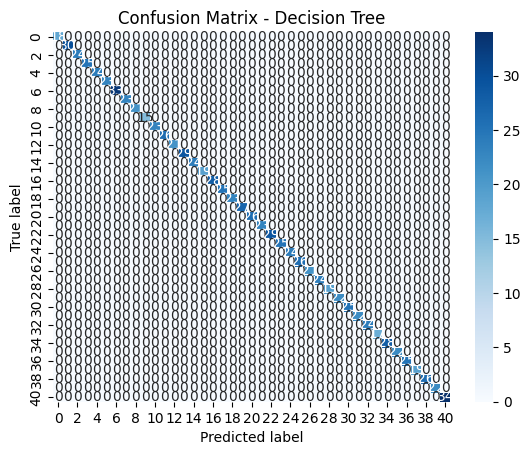

In [ ]:
evaluate_model(best_model, x_test, y_test, model_name="Decision Tree")

#### KNN

In [ ]:
evaluate_model(best_knn_model, x_test, y_test, model_name="KNN")

#### SVM

In [ ]:
evaluate_model(best_svm_model, x_test, y_test, model_name="SVM")

#### Regresión Logística

In [ ]:
evaluate_model(best_logreg_model, x_test, y_test, model_name="Logistic Regression")

#### Random Forest

In [ ]:
evaluate_model(best_rf_model, x_test, y_test, model_name="Random Forest")

In [ ]:
# Step 2: Generate predictions on the test set
y_pred_rf = best_rf_model.predict(x_test)

# Step 3: Optionally, evaluate the predictions using accuracy or other metrics
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {accuracy_rf:.4f}")

# Generate a classification report (includes precision, recall, and F1-score)
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Step 4: If you have new data (e.g., new_X), you can predict on that as well
# new_y_pred_rf = best_rf_model.predict(new_X)


### Resultados

Todos los modelos obtuvieron los mismos resultados, los cuales son los siguientes:

#### Métricas

**Accuracy: 1**

Accuracy es la proporción de instancias correctamente clasificadas sobre el total de instancias. Un valor de 1 significa que el modelo ha clasificado correctamente todas las instancias del conjunto de prueba, sin cometer errores.

**Precision: 1**

Precision es la proporción de verdaderos positivos sobre todos los ejemplos que el modelo predijo como positivos. En otras palabras, indica qué tan confiable es el modelo al etiquetar una instancia como positiva. Un valor de 1 significa que todas las instancias predichas como positivas eran realmente positivas, es decir que no hubo falsos positivos.

**Sensitivity (Recall): 1**

Sensitivity o recall es la proporción de ejemplos positivos que el modelo ha sido capaz de identificar correctamente. Un valor de 1 indica que el modelo identificó correctamente todos los ejemplos positivos, sin cometer errores, es decir que no hubo falsos negativos.

**F1-Score: 1**

F1-Score es la media entre precision y recall. Se utiliza cuando se quiere un balance entre estas métricas. Un valor de 1 sugiere que el balance entre precision y recall es perfecto.

**Conclusión:**

Estos valores indican un rendimiento perfecto del modelo, es decir, el modelo ha clasificado todos los ejemplos correctamente, sin cometer errores de ningún tipo (ni falsos positivos ni falsos negativos).
Esto podría indicar que hubo sobreajuste, lo que significaría que el modelo aprendió demasiado bien los patrones del conjunto de entrenamiento y podría no generalizar bien con datos nuevos.
También se considera el hecho de que los datos son demasiado sencillos, sólo se componen de síntomas dando como resultado enfermedades, y debido a esto las clases están claramente separadas, por lo que para un modelo es fácil aprenderse los patrones.

El siguiente paso sería evaluar el modelo con un conjunto de datos adicional (no visto) para validar si mantiene un buen rendimiento y generaliza adecuadamente.

Por el momento se acepta el modelo debido a la baja complejidad del conjunto de datos.


# Fase 6: Deployment

### Exportación del modelo

A continuación se exporta el modelo con la librería pickle.

In [ ]:
import pickle

# Export the best_rf_model to a file
model_filename = 'best_rf_model.pkl'

# Use pickle to save the model
with open(model_filename, 'wb') as file:
    pickle.dump(best_rf_model, file)

print(f"Model saved as {model_filename}")


NameError: name 'best_rf_model' is not defined

Se importa el modelo que exportamos previamente.

In [ ]:
import pickle

model_filename = 'best_rf_model.pkl'
# Load the model from the file
with open(model_filename, 'rb') as file:
    loaded_rf_model = pickle.load(file)

print("Model loaded successfully!")


Model loaded successfully!


Se realizan predicciones para validar su funcionamiento.

In [ ]:
# Using the loaded model to make predictions
y_pred_loaded_rf = loaded_rf_model.predict(x_test)

Se visualizan las predicciones realizadas con el modelo exportado.

In [ ]:
y_pred_loaded_rf

array(['Acne', 'Acne', 'Hyperthyroidism', 'AIDS', 'Chronic cholestasis',
       'Hypertension', 'Hypoglycemia', 'Arthritis', 'Hepatitis B',
       'Migraine', 'Urinary tract infection', 'Diabetes', 'Hepatitis D',
       'Psoriasis', 'Alcoholic hepatitis', 'Alcoholic hepatitis',
       'Dimorphic hemmorhoids(piles)', 'Hepatitis E', 'Diabetes',
       'Cervical spondylosis', 'Bronchial Asthma', 'hepatitis A',
       'Hepatitis B', 'Bronchial Asthma', 'Allergy', 'Hepatitis C',
       'Pneumonia', 'Migraine', 'Hypothyroidism', 'Migraine',
       'Chronic cholestasis', 'Hepatitis B', 'Gastroenteritis',
       'Hepatitis E', 'Varicose veins', 'Migraine', 'Jaundice',
       'Drug Reaction', 'Pneumonia', 'Urinary tract infection',
       'Hepatitis C', '(vertigo) Paroymsal  Positional Vertigo',
       'Hypertension', 'Diabetes', 'Jaundice', 'Gastroenteritis',
       'Hypoglycemia', 'Hepatitis B', 'Psoriasis', 'Psoriasis',
       'Heart attack', 'Tuberculosis', 'Varicose veins', 'Allergy',
    

In [ ]:
# If the label order was stored with the model, try inspecting the model object
# For example, if you used a LabelEncoder or other preprocessor, it may be accessible.
if hasattr(loaded_rf_model, 'classes_'):
    labels = loaded_rf_model.classes_  # This may work for certain classifiers
    print(labels)

['(vertigo) Paroymsal  Positional Vertigo' 'AIDS' 'Acne'
 'Alcoholic hepatitis' 'Allergy' 'Arthritis' 'Bronchial Asthma'
 'Cervical spondylosis' 'Chicken pox' 'Chronic cholestasis' 'Common Cold'
 'Dengue' 'Diabetes' 'Dimorphic hemmorhoids(piles)' 'Drug Reaction'
 'Fungal infection' 'GERD' 'Gastroenteritis' 'Heart attack' 'Hepatitis B'
 'Hepatitis C' 'Hepatitis D' 'Hepatitis E' 'Hypertension'
 'Hyperthyroidism' 'Hypoglycemia' 'Hypothyroidism' 'Impetigo' 'Jaundice'
 'Malaria' 'Migraine' 'Osteoarthristis' 'Paralysis (brain hemorrhage)'
 'Peptic ulcer diseae' 'Pneumonia' 'Psoriasis' 'Tuberculosis' 'Typhoid'
 'Urinary tract infection' 'Varicose veins' 'hepatitis A']
